# 1. data setup

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('..\\00-source-data\\testy.csv')
df.head()

,datum,prirustkovy_pocet_testu,kumulativni_pocet_testu
0,2020-01-27,20,20
1,2020-01-28,8,28
2,2020-01-29,5,33
3,2020-01-30,1,34
4,2020-01-31,3,37


In [3]:
df.tail()

,datum,prirustkovy_pocet_testu,kumulativni_pocet_testu
256,2020-10-09,27553,1576066
257,2020-10-10,17976,1594042
258,2020-10-11,11477,1605519
259,2020-10-12,21918,1627437
260,2020-10-13,30894,1658331


In [4]:
df.dtypes

datum                      object
prirustkovy_pocet_testu     int64
kumulativni_pocet_testu     int64
dtype: object

In [5]:
df.columns = ['datum', 'prirustkovy_pocet_testu', 'kumulativni_pocet_testu']

In [6]:
df.datum = df.datum.apply(pd.to_datetime)

In [7]:
df.dtypes

datum                      datetime64[ns]
prirustkovy_pocet_testu             int64
kumulativni_pocet_testu             int64
dtype: object

In [8]:
len(df)

261

In [9]:
df.head()

,datum,prirustkovy_pocet_testu,kumulativni_pocet_testu
0,2020-01-27,20,20
1,2020-01-28,8,28
2,2020-01-29,5,33
3,2020-01-30,1,34
4,2020-01-31,3,37


# 2. plotting

In [10]:
sns.set(style="darkgrid")

x = df['datum']
y1 = df['prirustkovy_pocet_testu']

def plot(x, y, ax, title, y_label, plot_color, x_label):
    ax.set_title(title)
    ax.set_ylabel(y_label, color=plot_color)
    ax.set_xlabel(x_label)
    ax.tick_params(axis='y', labelcolor=plot_color)    
    ax.plot(x, y, color=plot_color)
    ax.xaxis.set_major_locator(plt.MaxNLocator(5))

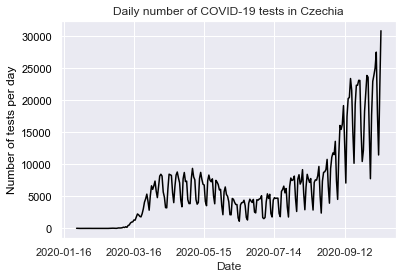

In [11]:
fig, ax = plt.subplots()
plot(x, y1, ax, 'Daily number of COVID-19 tests in Czechia', 'Number of tests per day', 'black', 'Date')

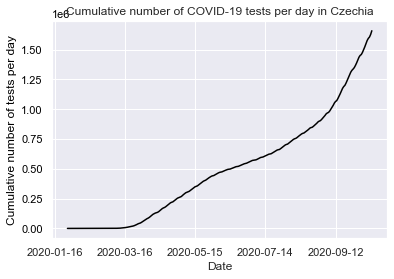

In [13]:
y2 = df.loc[:, ['kumulativni_pocet_testu']]
fix, ax = plt.subplots()
plot(x, y2, ax, 'Cumulative number of COVID-19 tests per day in Czechia', 'Cumulative number of tests per day','black', 'Date')

In [14]:
start_date = df.iloc[0][0].strftime("%d.%m.%Y")
end_date = df.iloc[len(df)-1][0].strftime('%d.%m.%Y')
combined_title = 'Number of COVID-19 tests in Czechia between ' + start_date + ' and ' + end_date

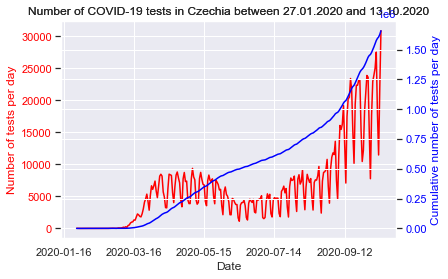

In [15]:
fig, ax1 = plt.subplots()
plot(x, y1, ax1, combined_title, 'Number of tests per day', 'red', 'Date')
ax2 = ax1.twinx()
plot(x, y2, ax2, combined_title, 'Cumulative number of tests per day', 'blue', 'Date')